<div style="text-align: center;">
    <h1 style="
        background: linear-gradient(135deg, #000850ff, #0003d0ff); 
        color: white; 
        padding: 15px 30px; 
        border-radius: 500px; 
        font-family: 'Segoe UI', Arial, sans-serif; 
        box-shadow: 0 4px 15px rgba(0,0,0,0.3);
        display: inline-block;
    ">
       Machine Learning Day 3 - Session 1
    </h1>
</div>


<h3 style="color:#001affff">1. Import The Required Libraries</h3>

In [49]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
import sklearn
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm
import pandas as pd
import sklearn.datasets
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import *
from sklearn.cluster import SpectralClustering



<h3 style="color:#001affff">2. Generating, Loading, and Preprocessing Synthetic and Real Datasets for Clustering Experiments</h3>

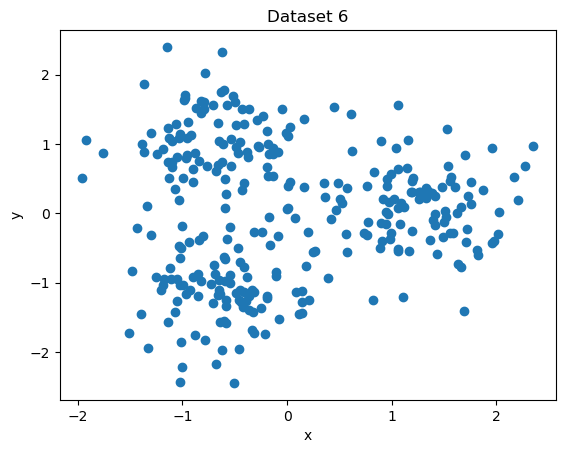

In [50]:
n_samples = 1500
dataset1 = sklearn.datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
X, y = make_circles(n_samples=1500, factor=0.5, noise=0.05, random_state=0)
dataset1 = pd.DataFrame(X, columns=["x", "y"])

dataset2 = sklearn.datasets.make_moons(n_samples=n_samples, noise=.05)
X, y = make_moons(n_samples=1500, noise=0.05, random_state=0)
dataset2 = pd.DataFrame(X, columns=["x", "y"])

dataset3 = sklearn.datasets.make_blobs(n_samples=n_samples, random_state=8)
X, y = make_blobs(n_samples=1500, random_state=8)
dataset3 = pd.DataFrame(X, columns=["x", "y"])

dataset4 = pd.DataFrame(np.random.rand(n_samples, 2), columns=["x", "y"])


dataset5 = pd.read_csv(r"C:\Users\Rammah\OneDrive\Desktop\اجازه ان شاء الله\ML\Day10\data\dataset5.csv")
dataset6 = pd.read_csv(r"C:\Users\Rammah\OneDrive\Desktop\اجازه ان شاء الله\ML\Day10\data\dataset6.csv")
dataset7 = pd.read_csv(r"C:\Users\Rammah\OneDrive\Desktop\اجازه ان شاء الله\ML\Day10\data\dataset7.csv")
dataset8 = pd.read_csv(r"C:\Users\Rammah\OneDrive\Desktop\اجازه ان شاء الله\ML\Day10\data\dataset8.csv")
dataset9 = pd.read_csv(r"C:\Users\Rammah\OneDrive\Desktop\اجازه ان شاء الله\ML\Day10\data\dataset9.csv")
for df in [dataset5, dataset6, dataset7, dataset8, dataset9]:
    df.columns = ["x", "y"] 
z = StandardScaler()
dataset6[["x","y"]] = z.fit_transform(dataset6)
dataset7[["x","y"]] = z.fit_transform(dataset7)
dataset8[["x","y"]] = z.fit_transform(dataset8)
dataset9[["x","y"]] = z.fit_transform(dataset9)
plt.scatter(dataset6["x"], dataset6["y"])

plt.title("Dataset 6")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

<h3 style="color:#001affff">3. Display the entire contents of dataset6 DataFrame</h3>

In [51]:
dataset6

,x,y
0,1.760863,0.448118
1,1.534861,0.688524
2,1.329800,0.368909
3,0.986577,-0.370113
4,1.075702,-0.155631
...,...,...
294,-0.518909,1.692598
295,-0.190558,1.186264
296,0.010316,1.119710
297,-1.957364,0.512976


<h3 style="color:#001affff">4. Visualizing all datasets (1–9) as scatter plots using Matplotlib</h3>

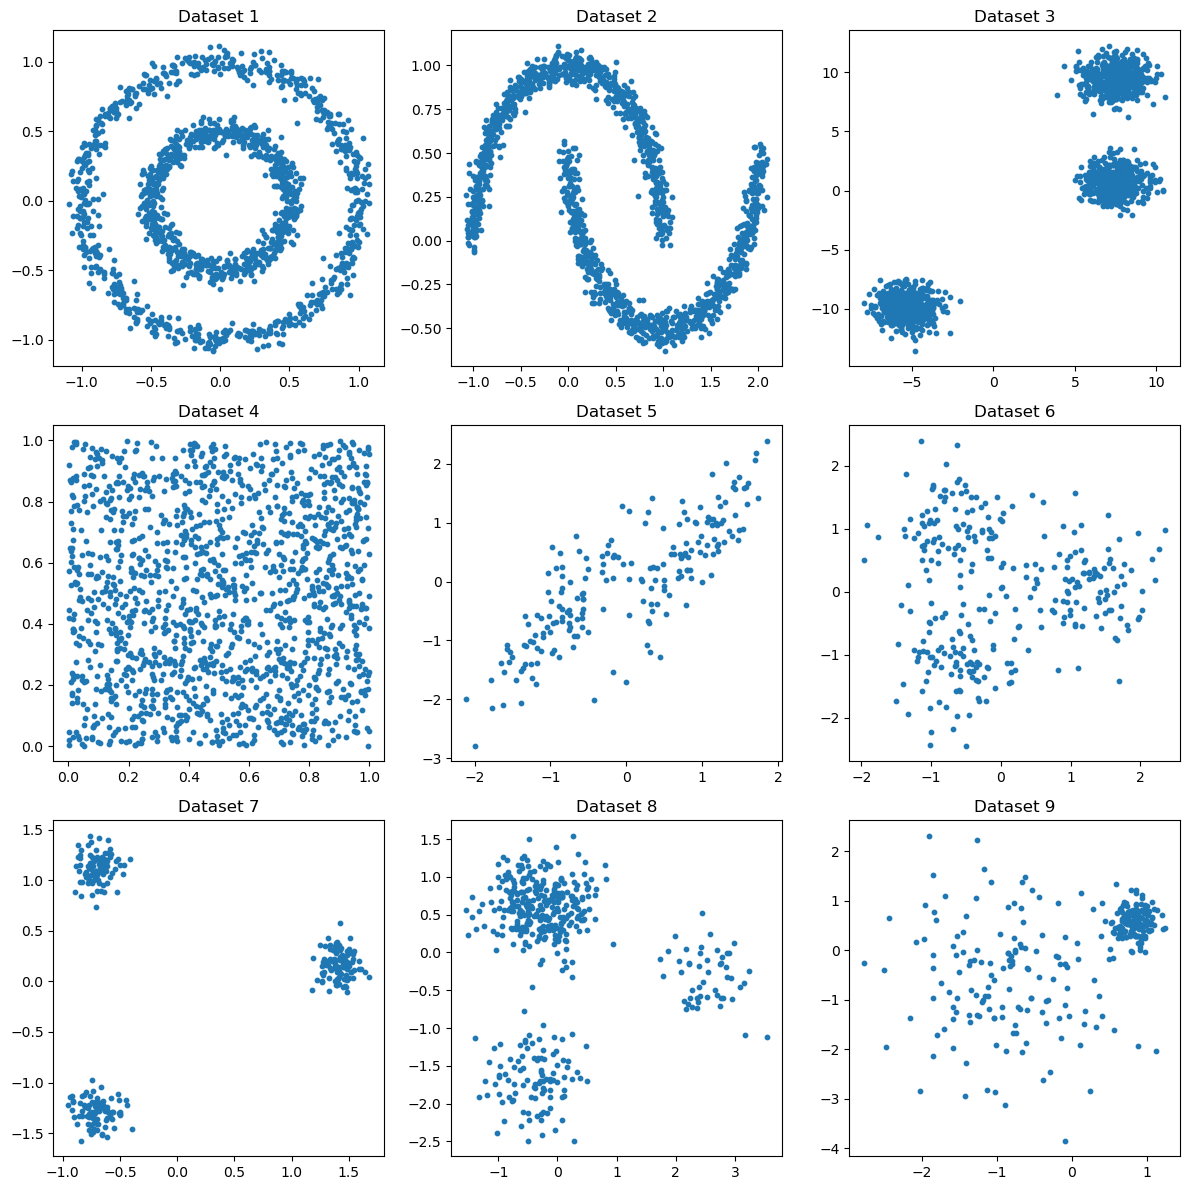

In [52]:
data = [dataset1, dataset2, dataset3, dataset4, dataset5, dataset6, dataset7, dataset8, dataset9]
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
for idx, dataset in enumerate(data):
    row = idx // 3
    col = idx % 3
    axes[row, col].scatter(dataset.iloc[:, 0], dataset.iloc[:, 1], s=10)
    axes[row, col].set_title(f"Dataset {idx+1}")

plt.tight_layout()
plt.show()


<h1 style="color:#FF9090">Gaussian Mixture Model (GMM)</h1>

<h3 style="color:#001affff">5. Gaussian Mixture Model Clustering and Visualization Function</h3>

In [53]:
def gmm_plot(data_set, n0_components, rand_state, ax=None):
    if ax is None:
        ax = plt.gca()
    gm = GaussianMixture(n_components=n0_components, random_state=rand_state)
    gm.fit(data_set[["x", "y"]])
    pred = gm.predict(data_set[["x", "y"]])
    ax.scatter(data_set["x"], data_set["y"], c=pred, s=10)
    ax.set_title("GaussianMixture")

<h3 style="color:#001affff">6. Apply Gaussian Mixture Model with 2 clusters on dataset1 and visualize the result</h3>

c:\Users\Rammah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


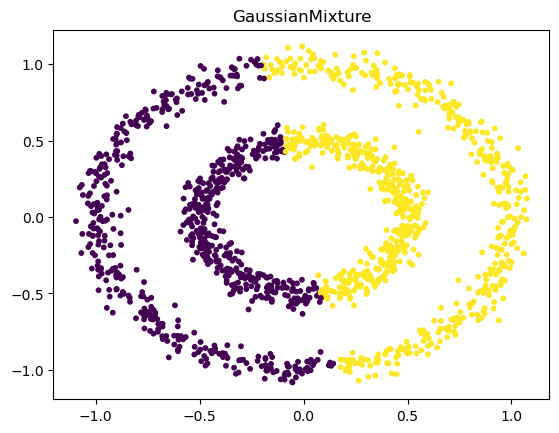

In [54]:
gmm_plot(dataset1, 2, 42)

<h3 style="color:#001affff">7. Function to Visualize the Original Dataset as a Scatter Plot</h3>

In [55]:
def data_plot(dataset, ax=None):
    if ax is None:
        ax = plt.gca()
    ax.scatter(dataset["x"], dataset["y"], s=10)
    ax.set_title("original")

<h3 style="color:#001affff">8. Function to Compare Original Data with Gaussian Mixture Clustering Side by Side</h3>

In [56]:
def cluster(data_set, no_cluster, rand_state):
    fig, axes = plt.subplots(1, 2, figsize=(25, 10))
    data_plot(data_set, ax=axes[0])
    gmm_plot(data_set, no_cluster, rand_state, ax=axes[1])
    plt.tight_layout()
    plt.show()

<h3 style="color:#001affff">8. Import The Required Libraries</h3>

c:\Users\Rammah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


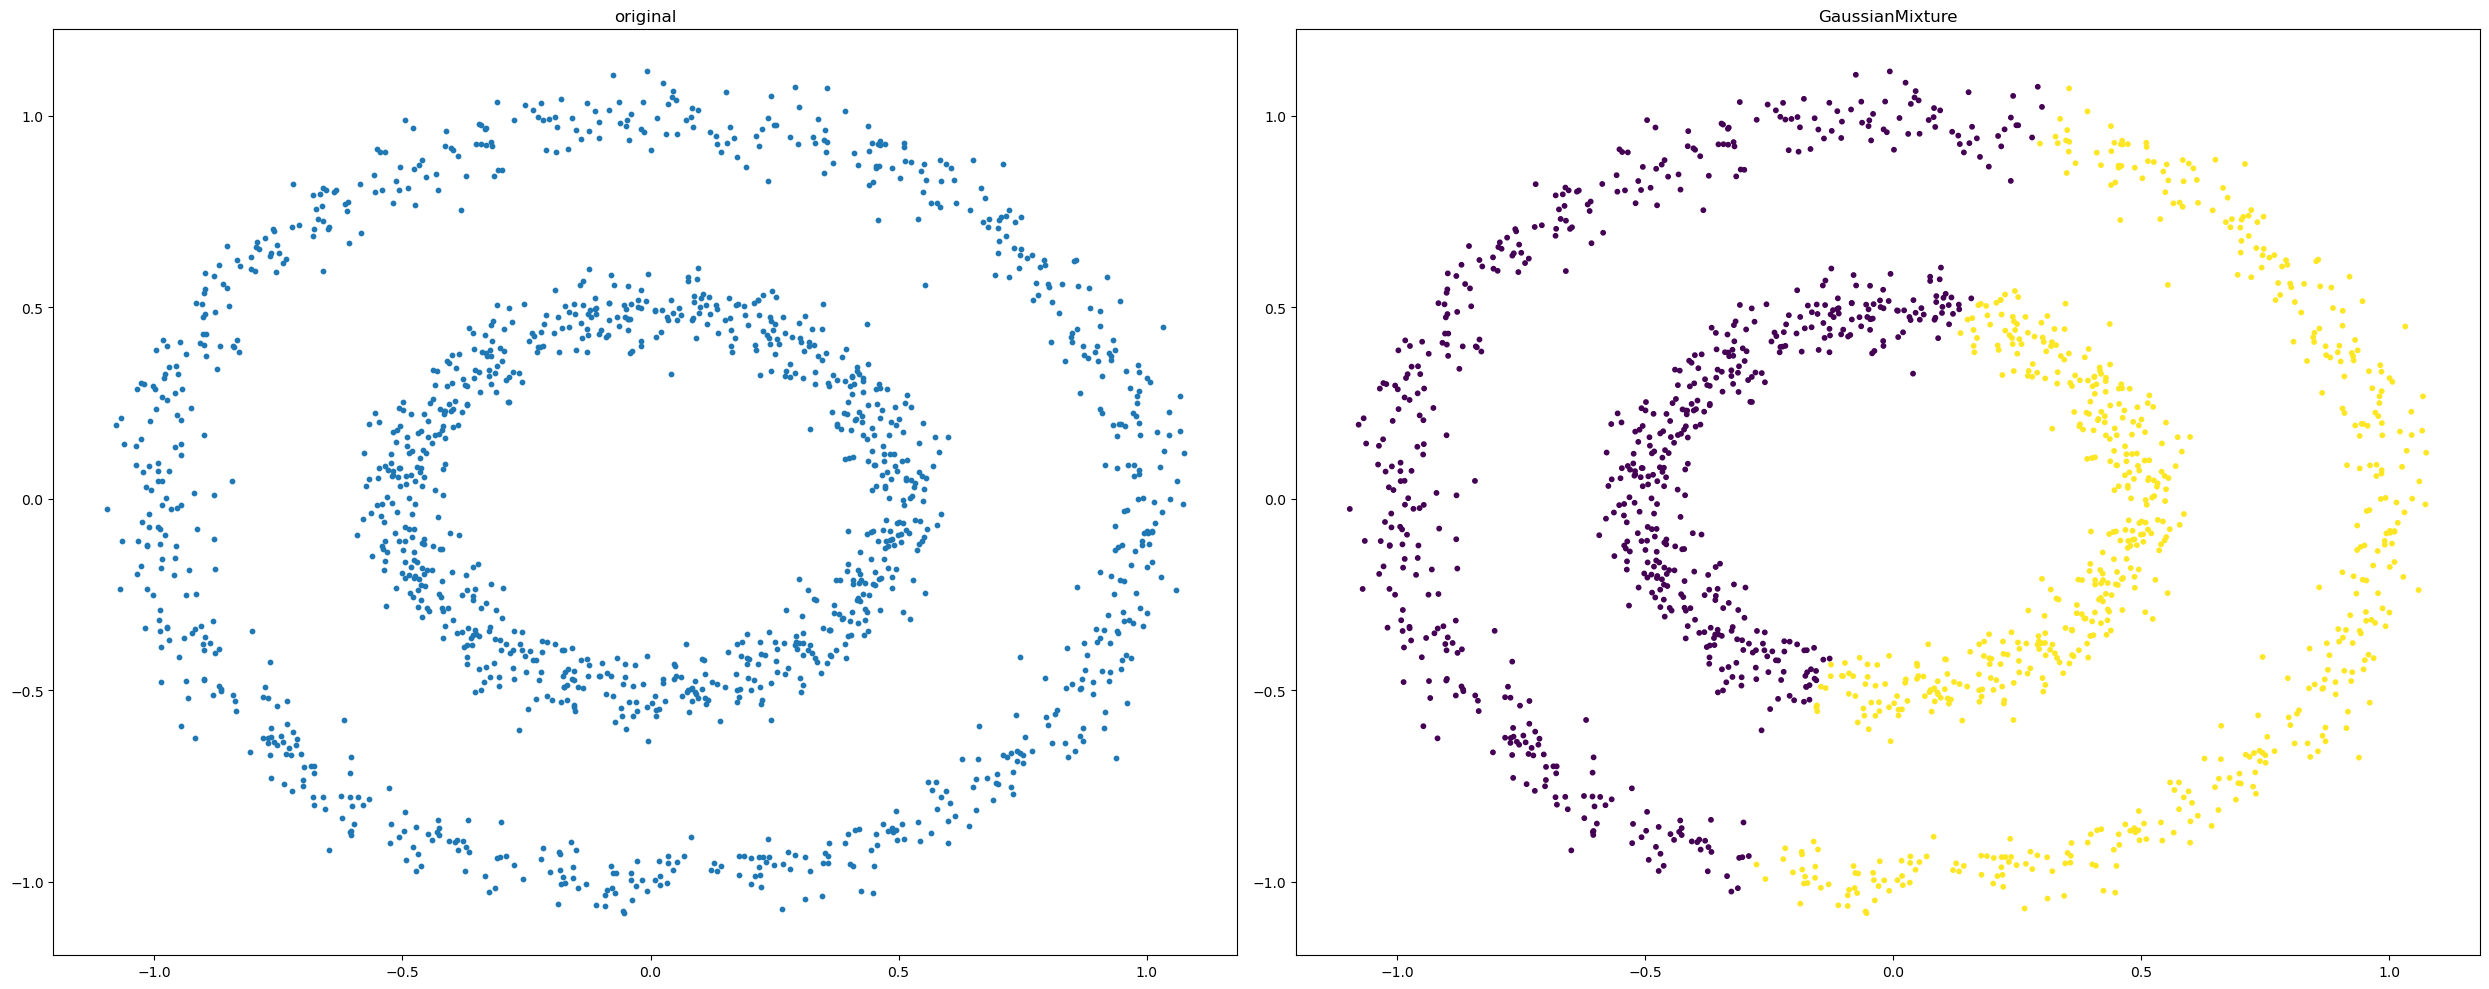

In [57]:
cluster(dataset1 , 2 , 0)

<h4 style="color:#001affff">9. Clustering Dataset2 (Moons) into 2 clusters using Gaussian Mixture Model (GMM) with random state = 0</h4>

c:\Users\Rammah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


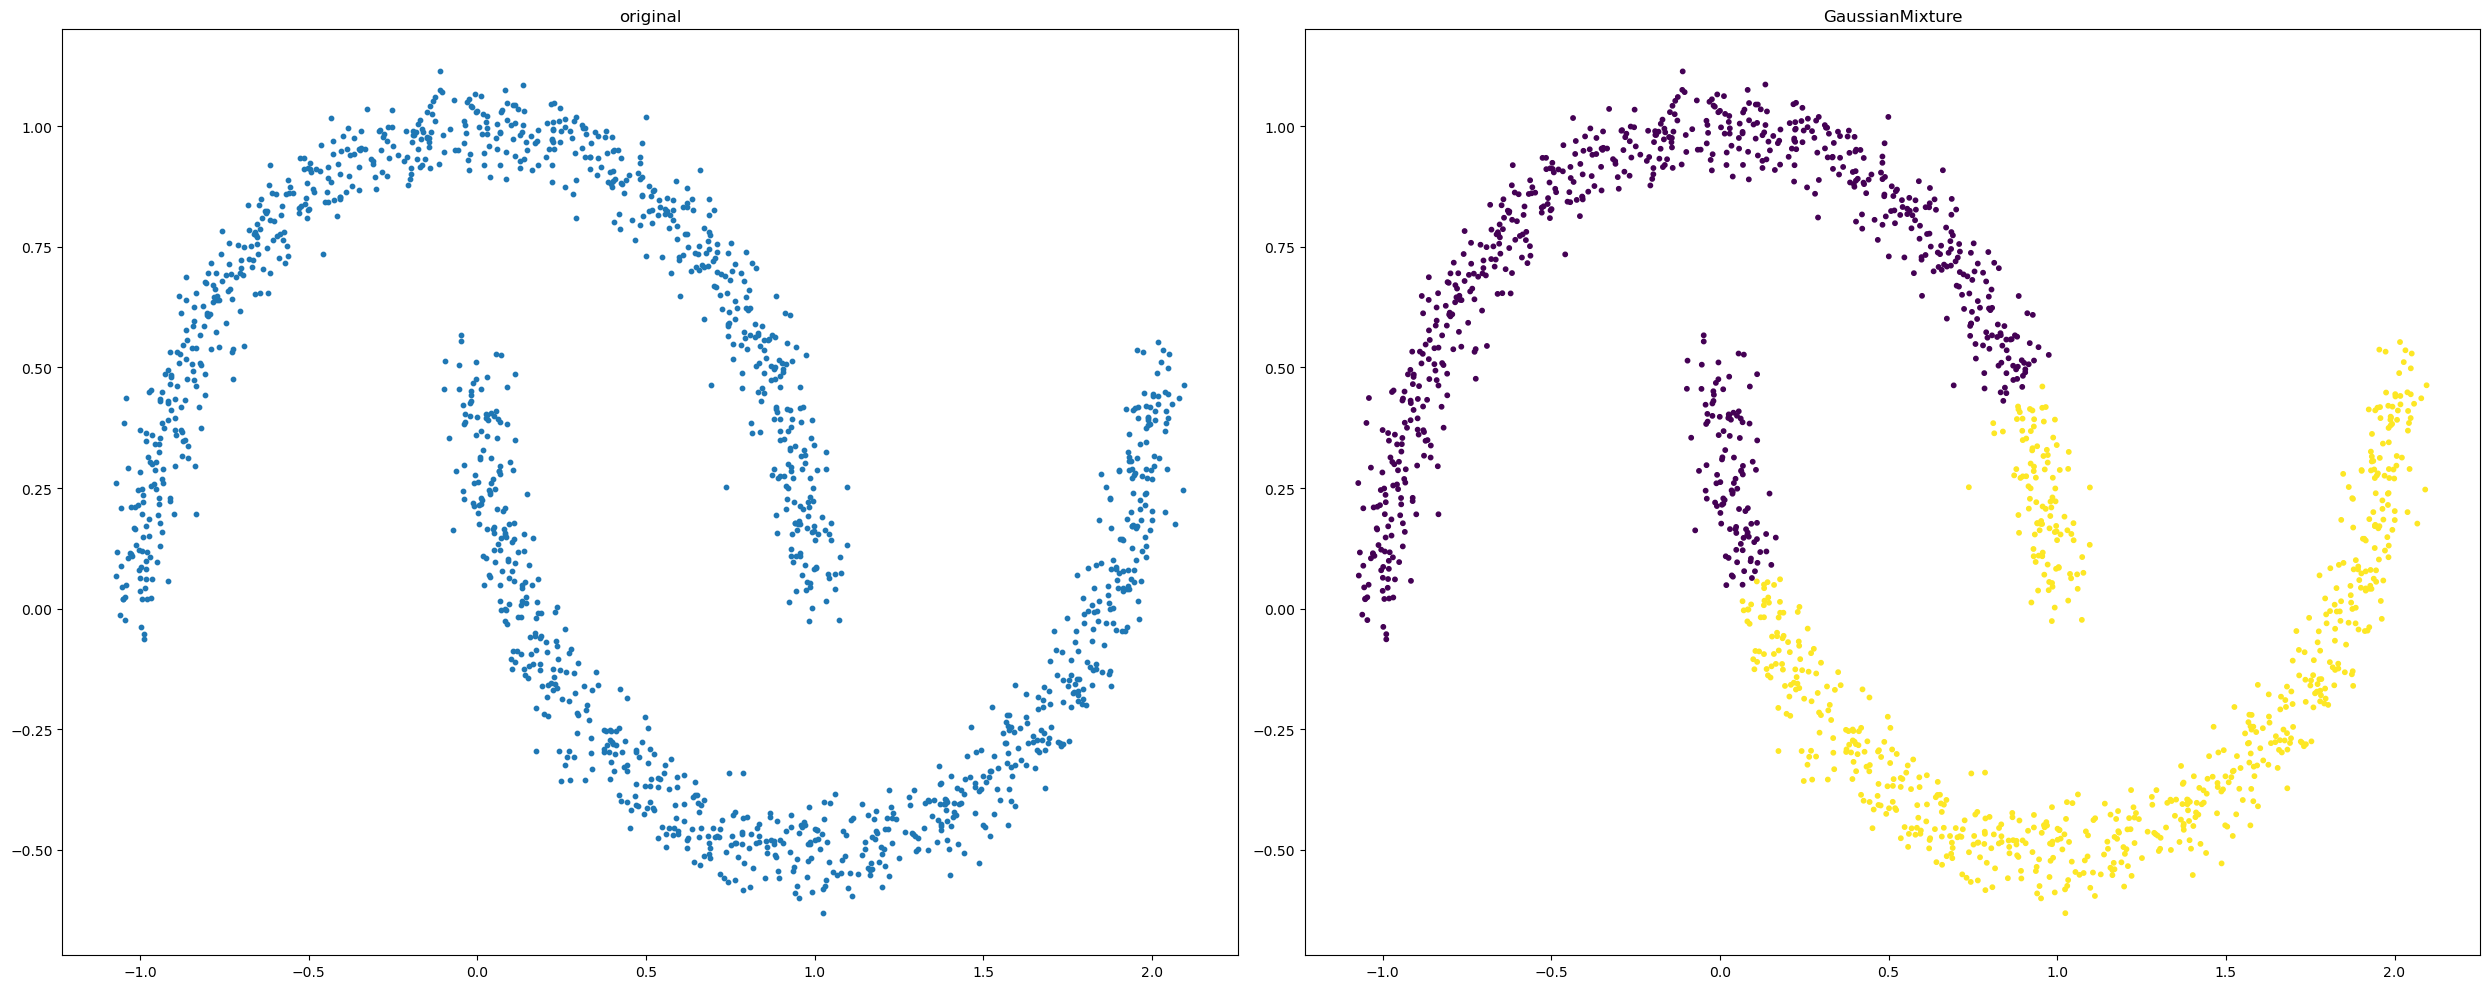

In [58]:
cluster(dataset2 , 2 , 0)

<h4 style="color:#001affff">10. Clustering Dataset3 (Blobs) into 3 clusters using Gaussian Mixture Model (GMM) with random state = 0</h4>

c:\Users\Rammah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


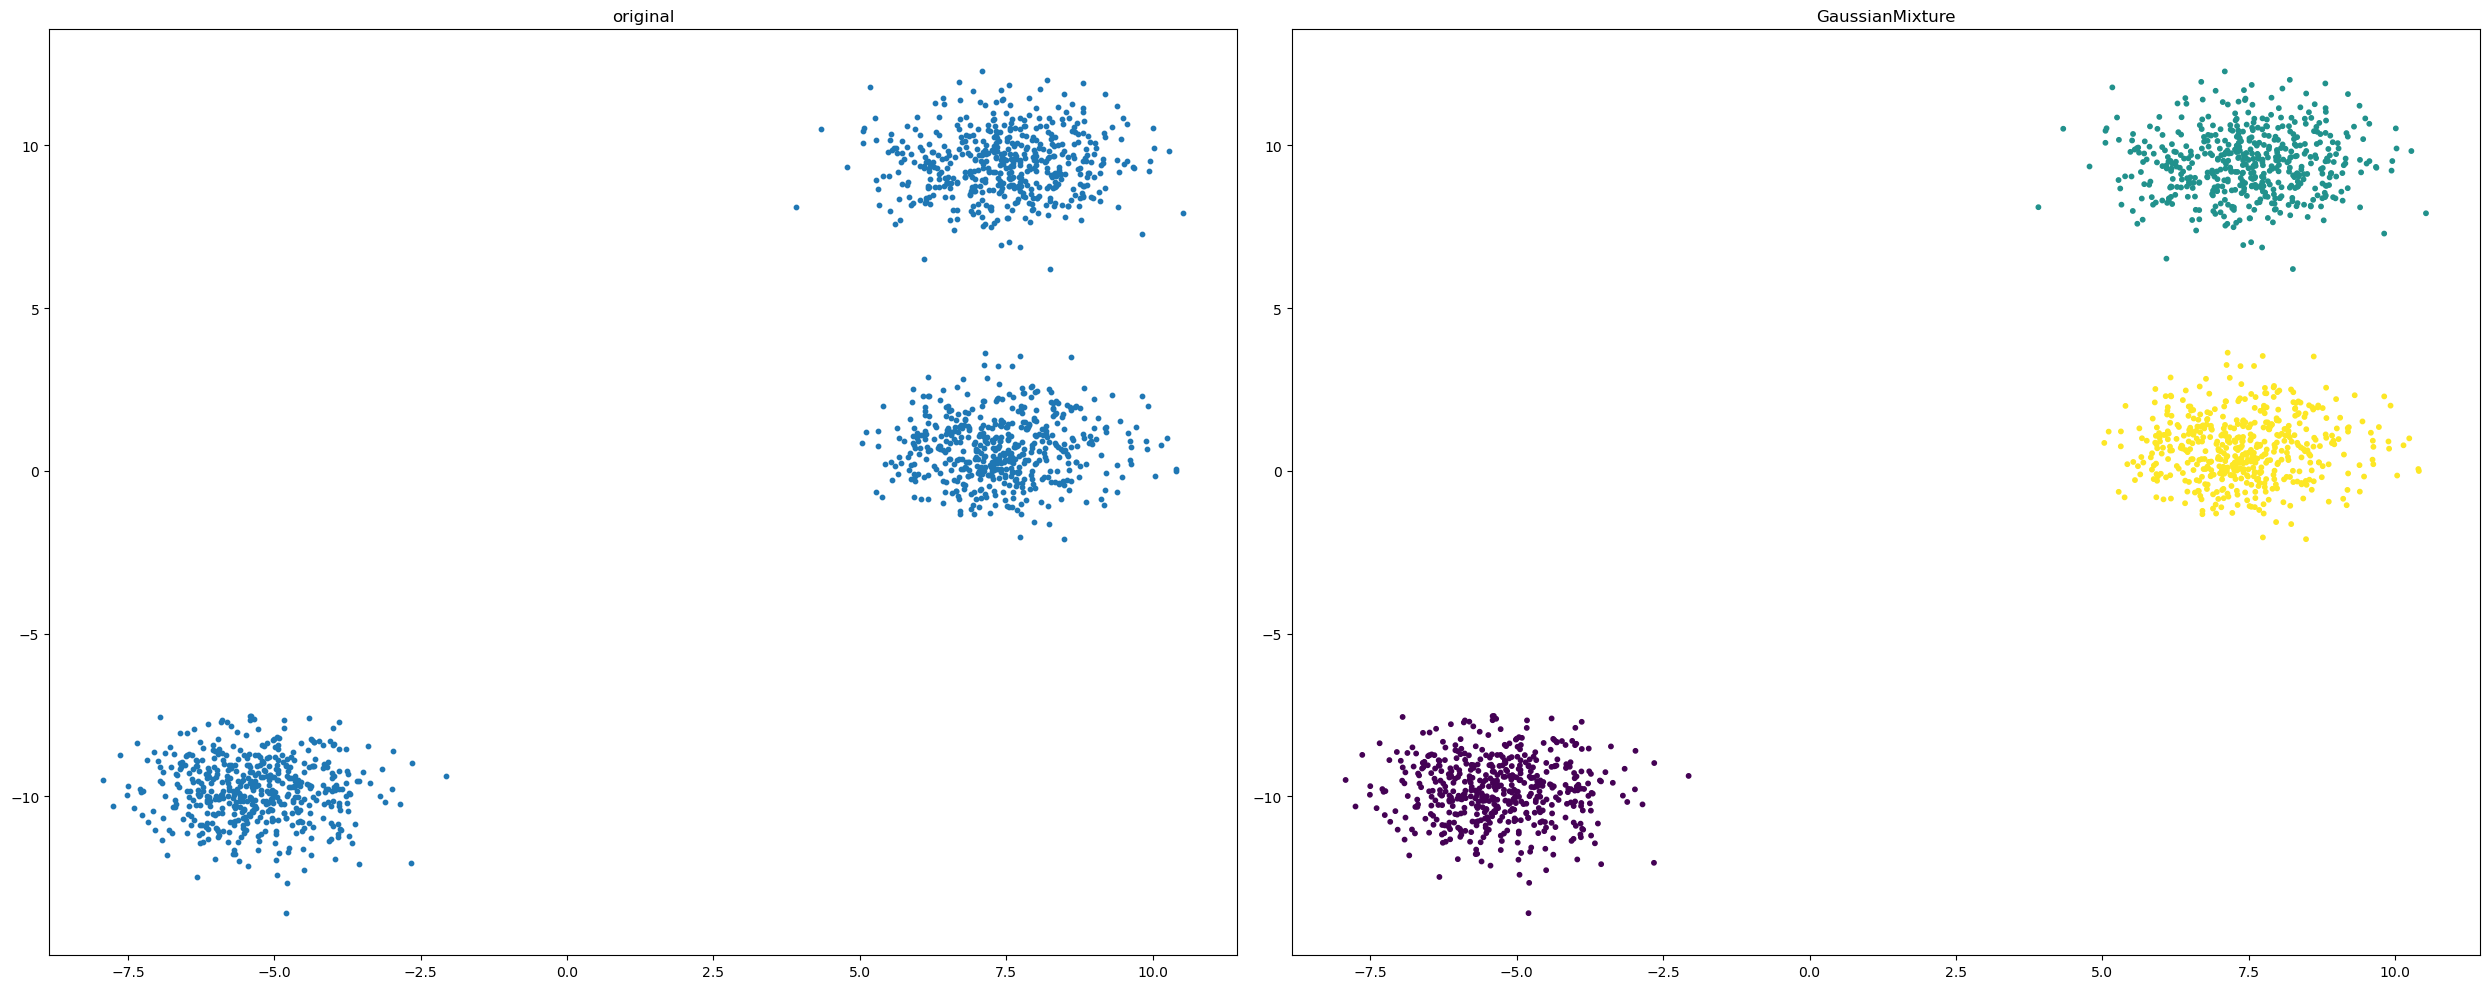

In [59]:
cluster(dataset3 , 3 , 0)

<h5 style="color:#001affff">11. Clustering Dataset4 (Random Uniform Data) into 3 clusters using Gaussian Mixture Model (GMM) with random state = 0</h5>

c:\Users\Rammah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


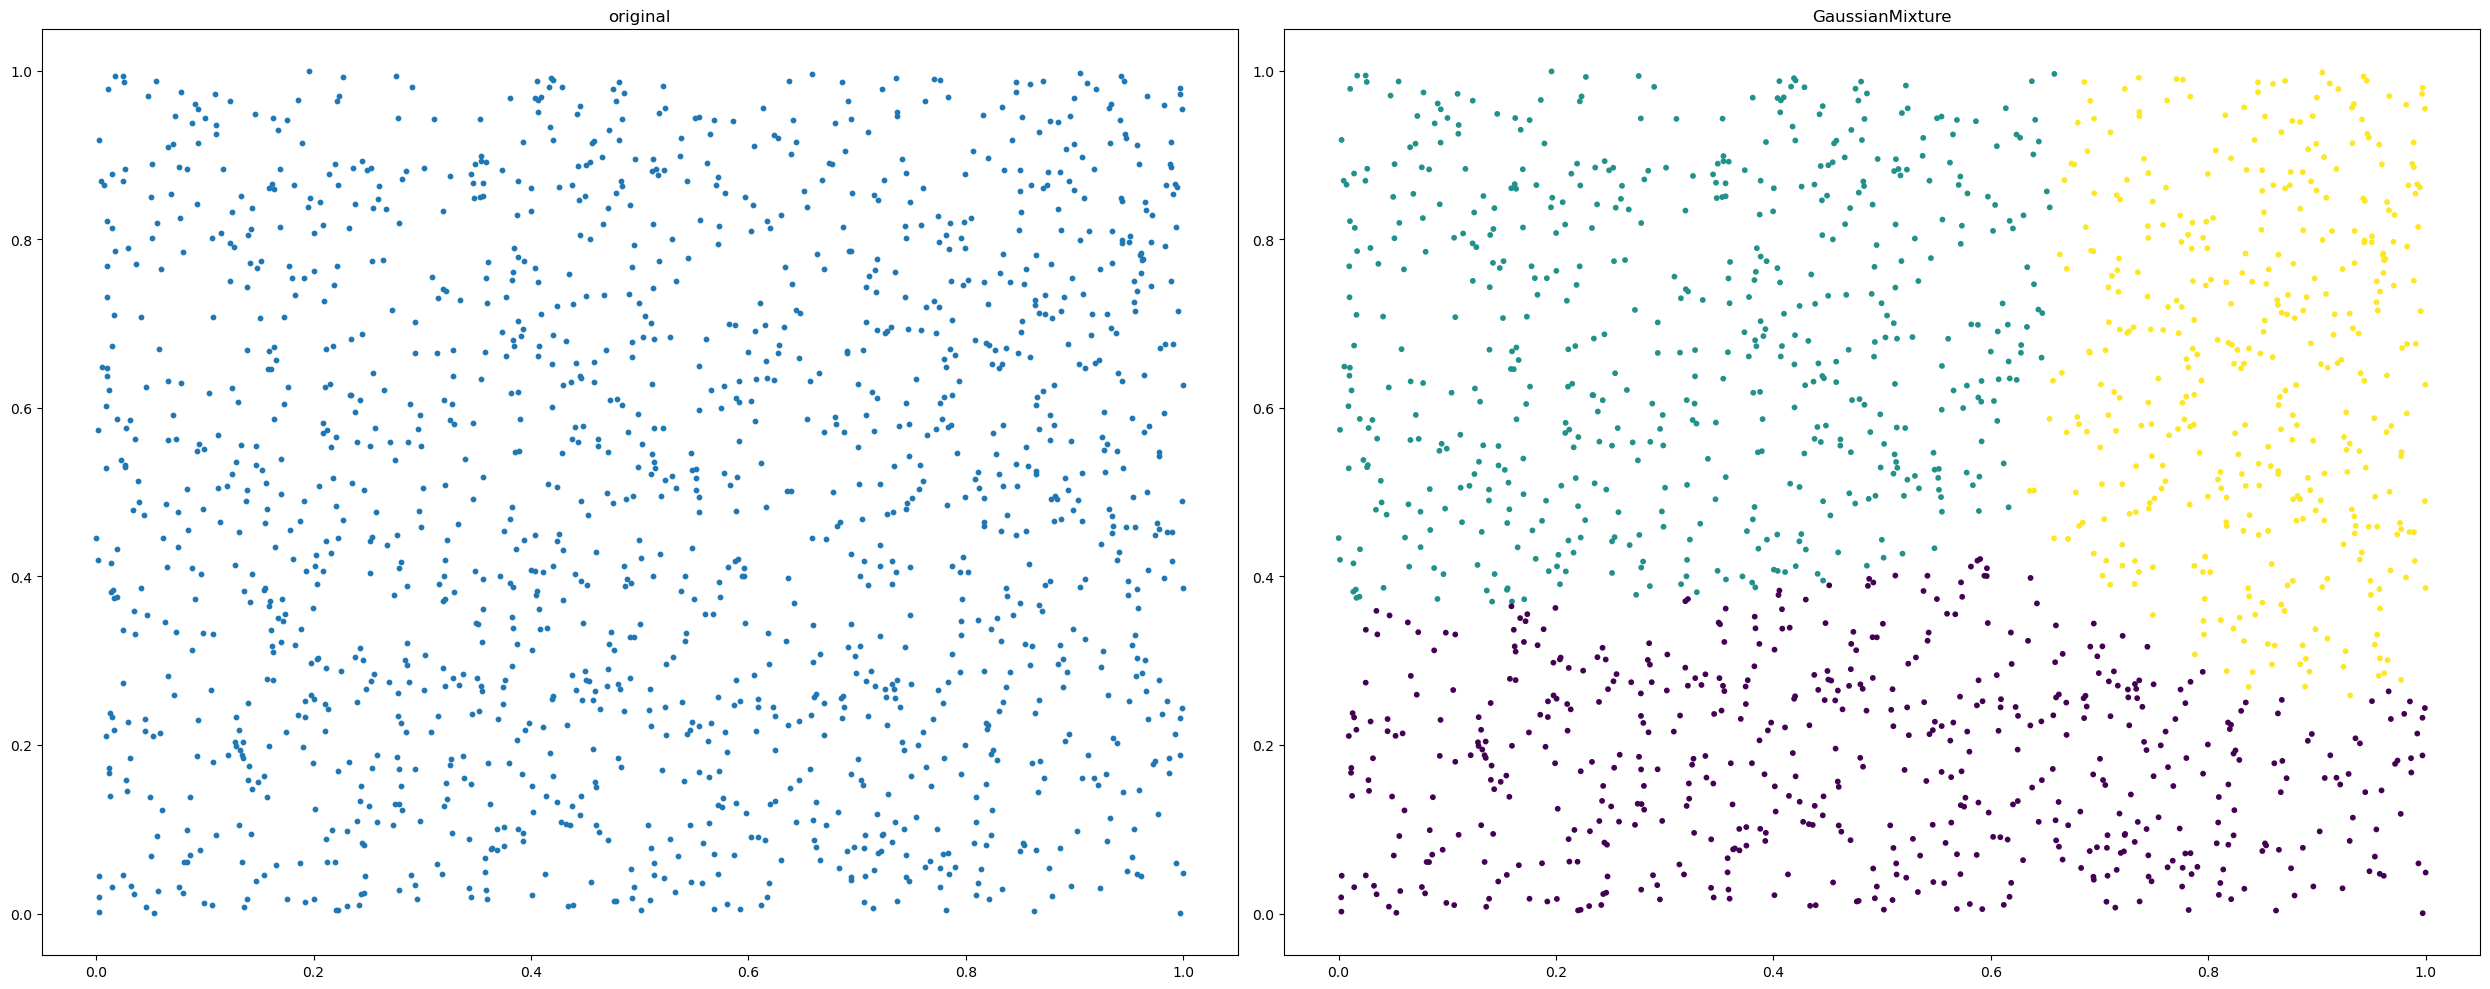

In [60]:
cluster(dataset4 , 3 , 0)

<h4 style="color:#001affff">12. Clustering Dataset5 (CSV Input Data) into 3 clusters using Gaussian Mixture Model (GMM) with random state = 0</h4>

c:\Users\Rammah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


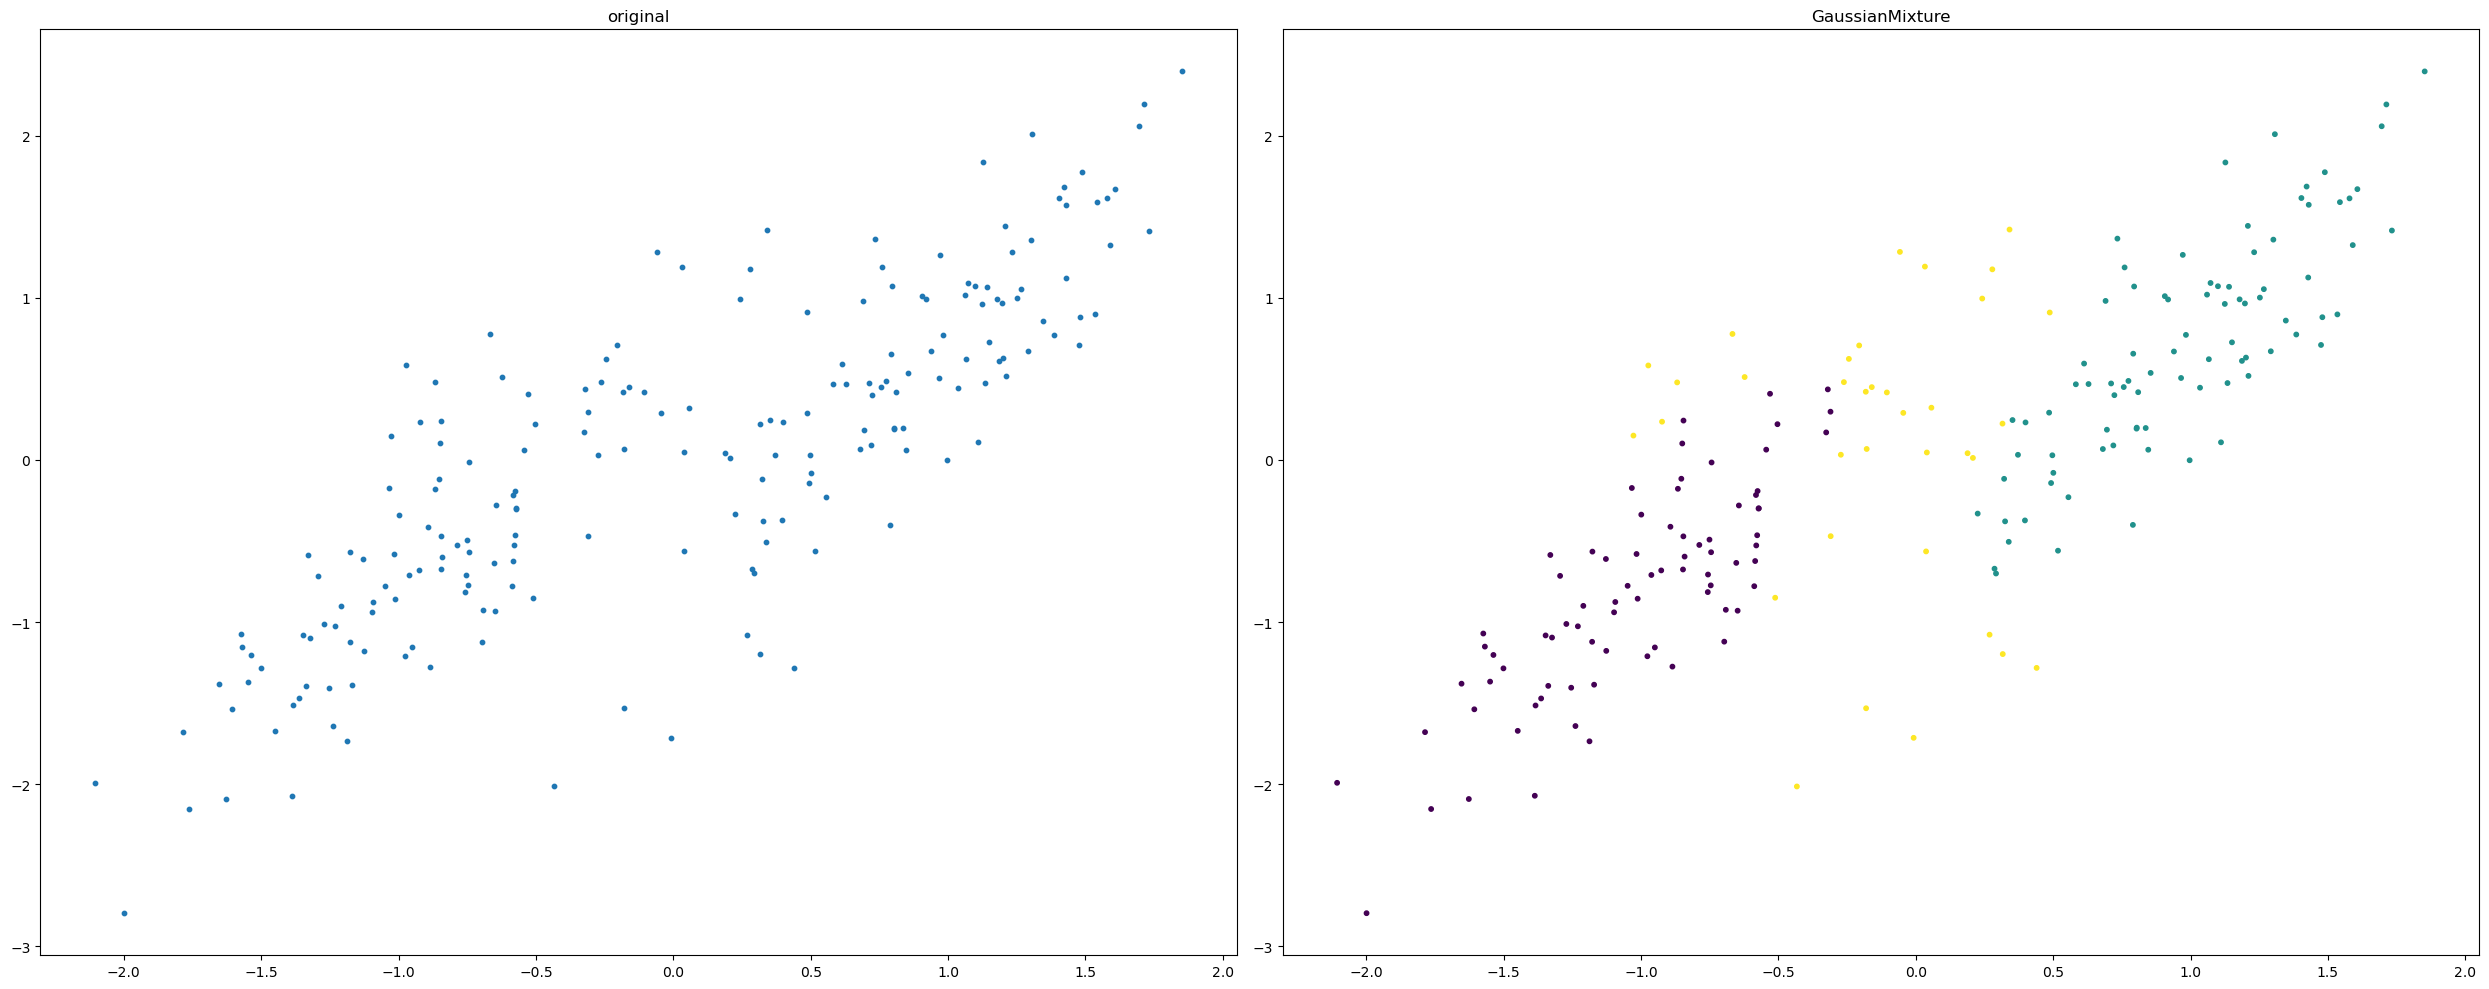

In [61]:
cluster(dataset5 , 3 , 0)

<h5 style="color:#001affff">13. Clustering Dataset6 (Standardized CSV Data) into 3 clusters using Gaussian Mixture Model (GMM) with random state = 0</h5>

c:\Users\Rammah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


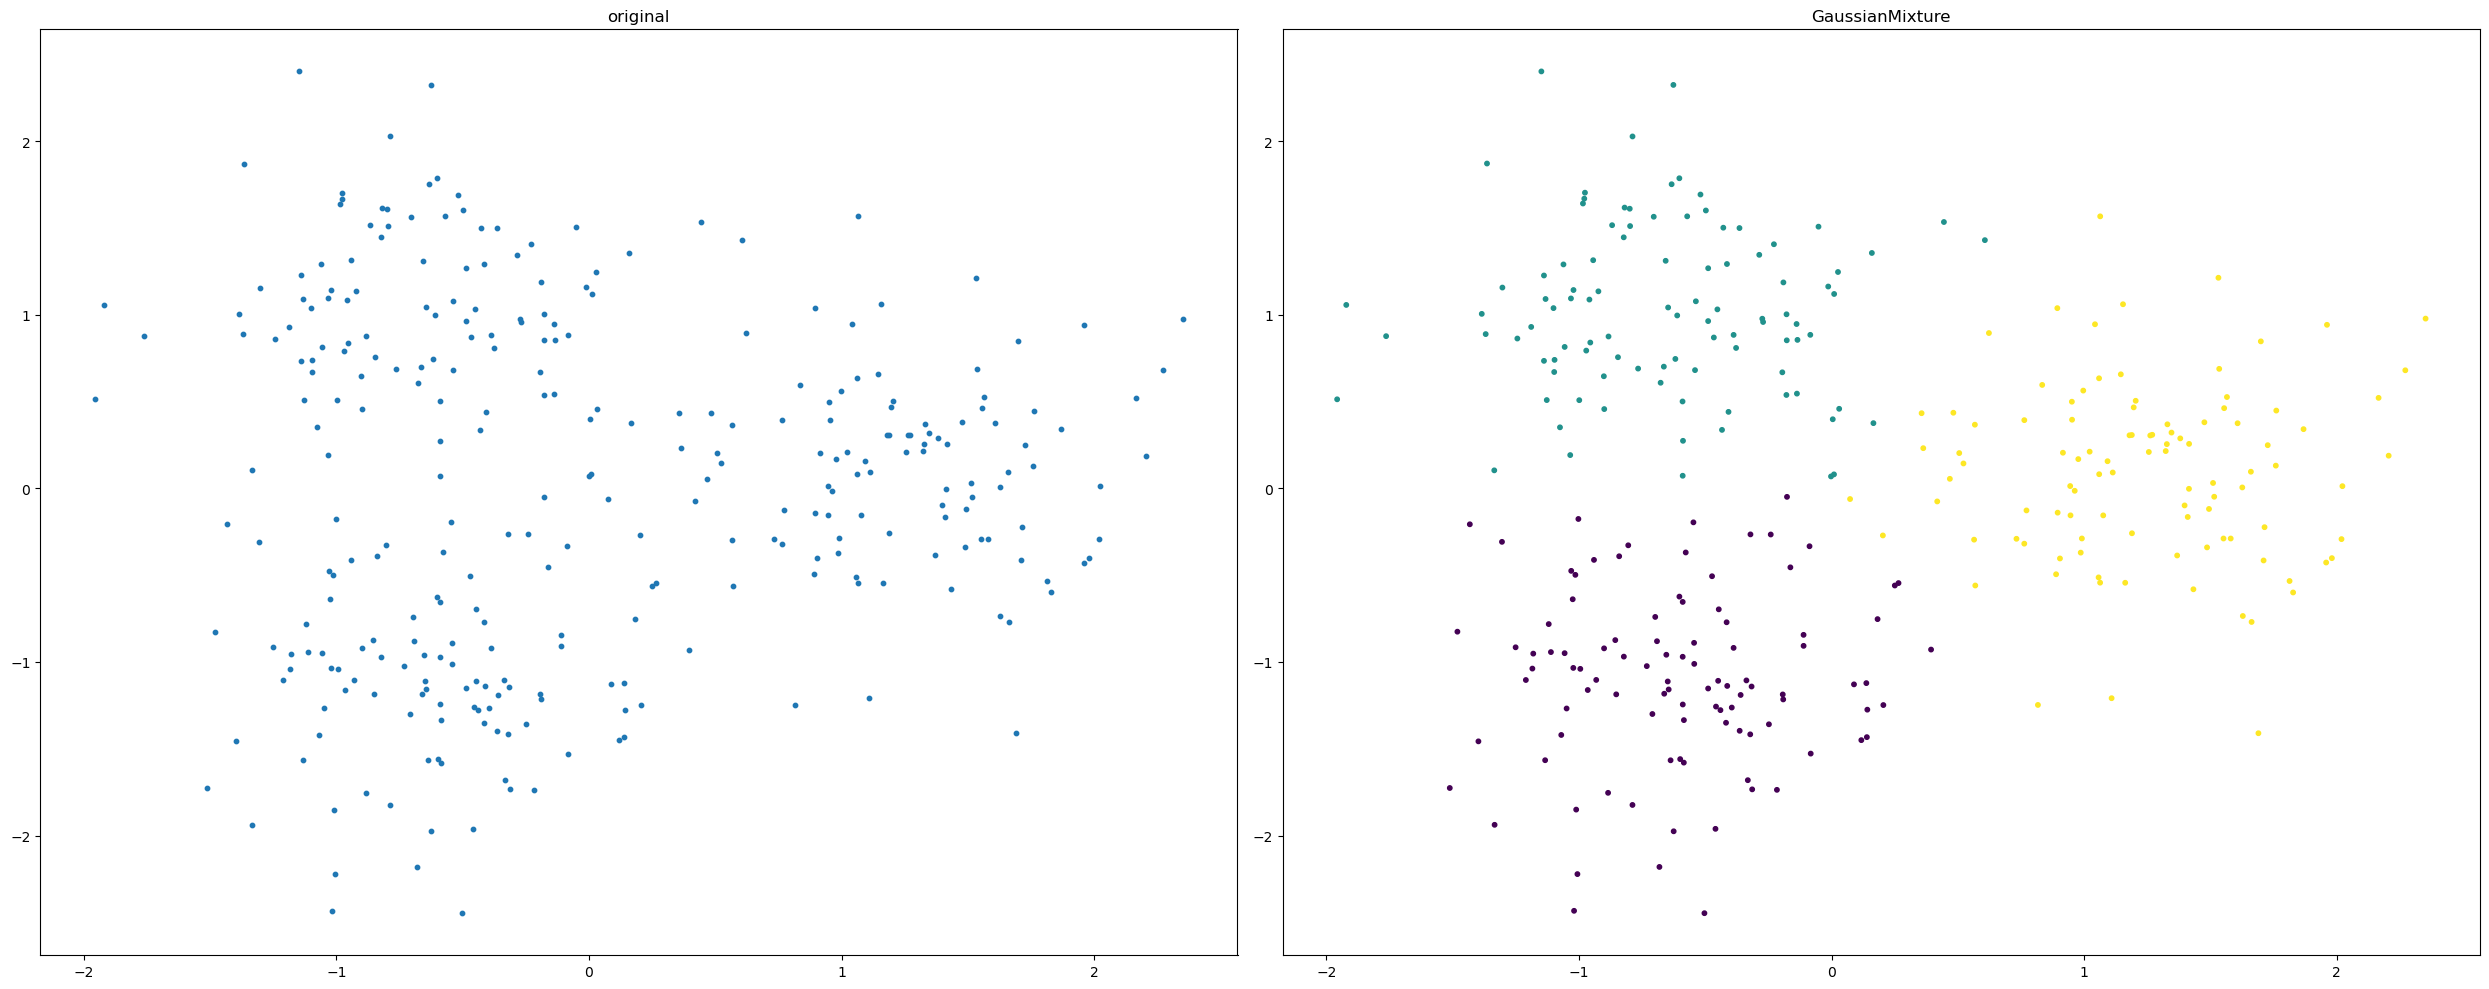

In [62]:
cluster(dataset6 , 3 , 0)

<h5 style="color:#001affff">14. Clustering Dataset7 (Standardized CSV Data) into 3 clusters using Gaussian Mixture Model (GMM) with random state = 0</h5>

c:\Users\Rammah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


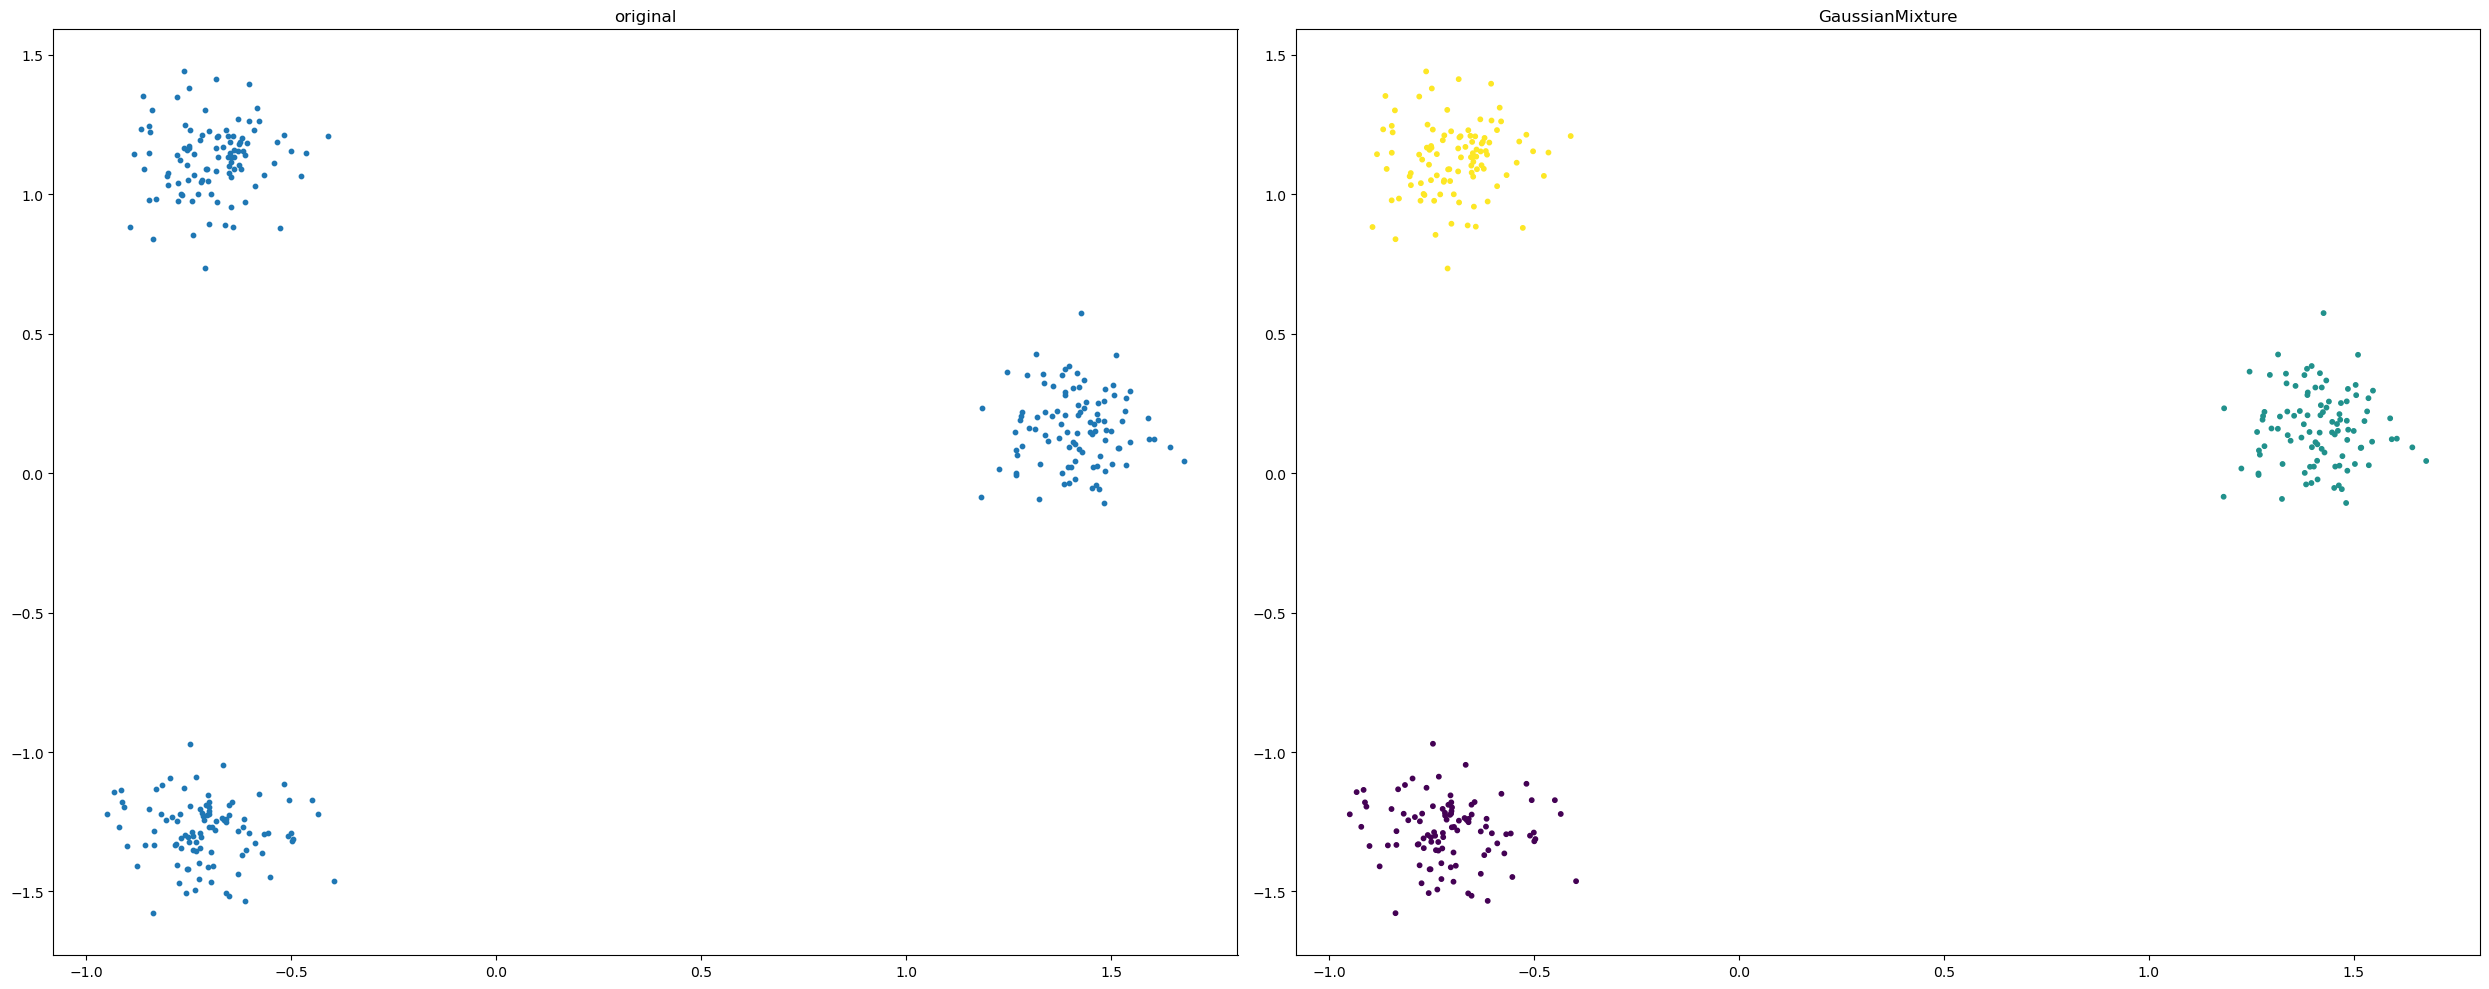

In [63]:
cluster(dataset7 , 3 , 0)

<h5 style="color:#001affff">15. Clustering Dataset8 (Standardized CSV Data) into 3 clusters using Gaussian Mixture Model (GMM) with random state = 0</h5>

c:\Users\Rammah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


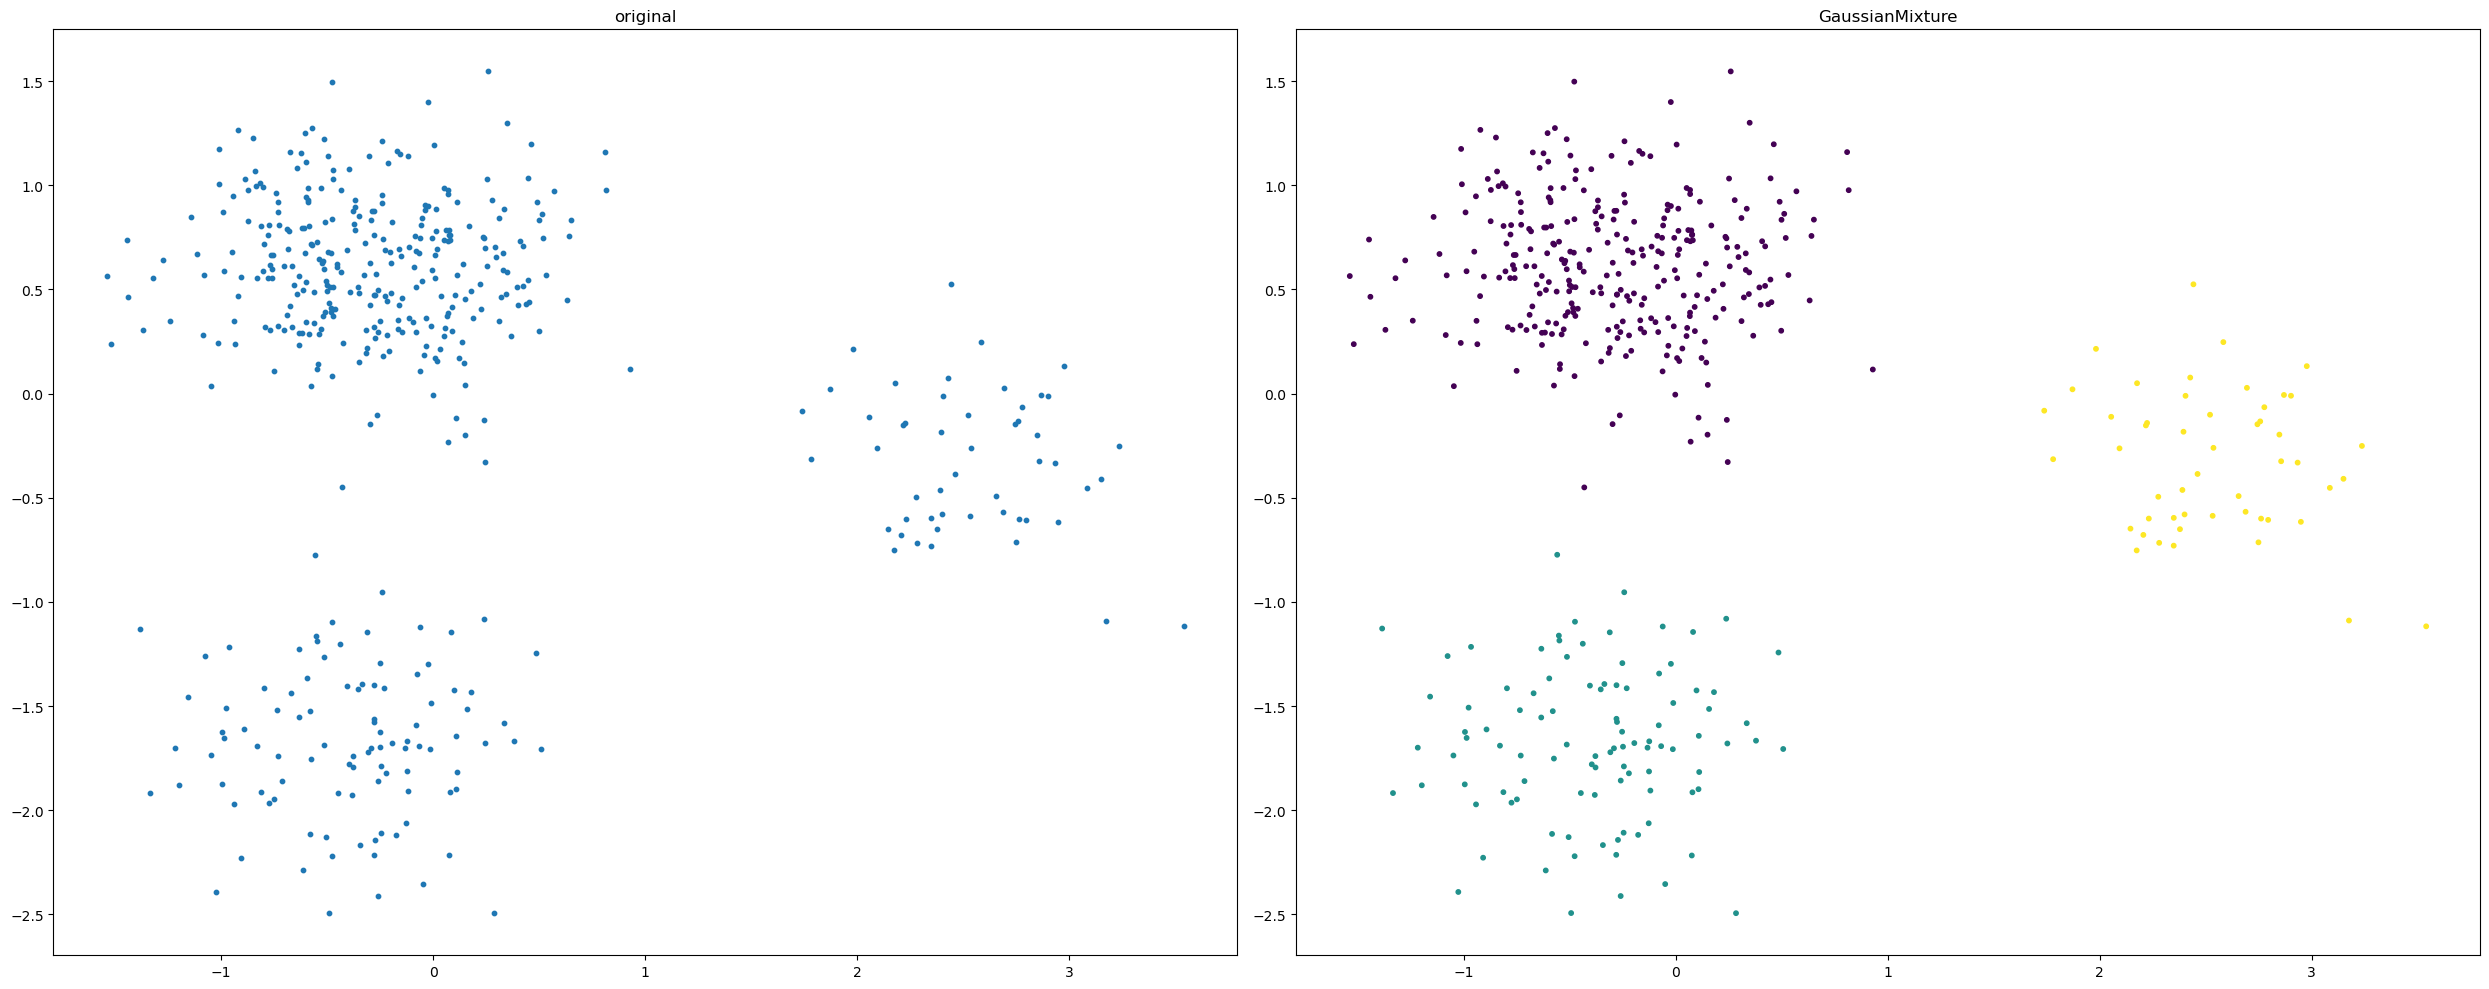

In [64]:
cluster(dataset8 , 3 , 0)

<h5 style="color:#001affff">16. Clustering Dataset9 (Standardized CSV Data) into 2 clusters using Gaussian Mixture Model (GMM) with random state = 0</h5>

c:\Users\Rammah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


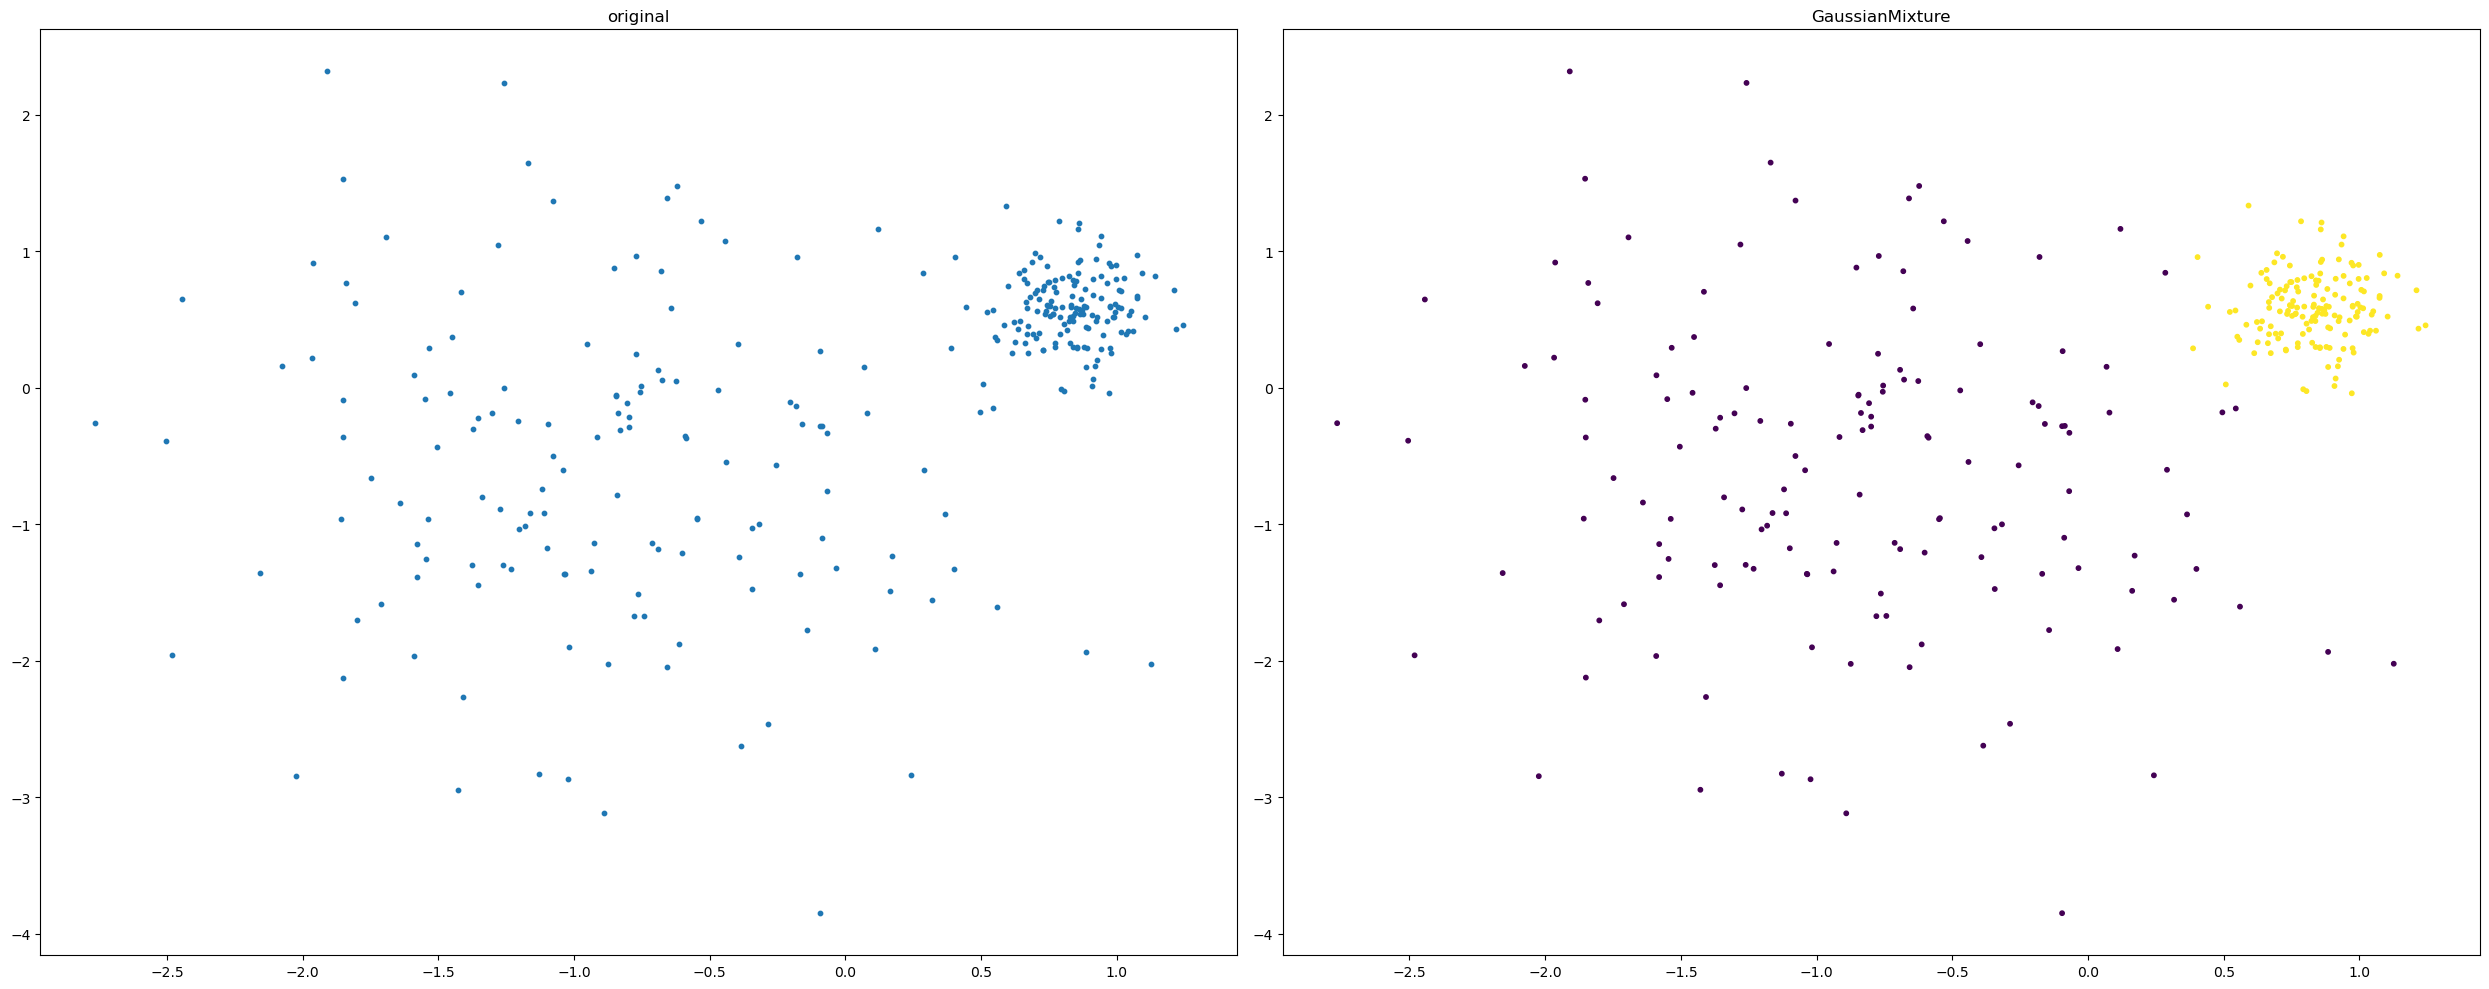

In [65]:
cluster(dataset9 , 2 , 0)

<h1 style="color:#FF9090">K-Means</h1>

<h5 style="color:#001affff">17. Clustering dataset1 into 2 clusters using K-Means and displaying cluster centers</h5>

c:\Users\Rammah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


array([[-0.45207117,  0.15022592],
       [ 0.45255355, -0.15153054]])

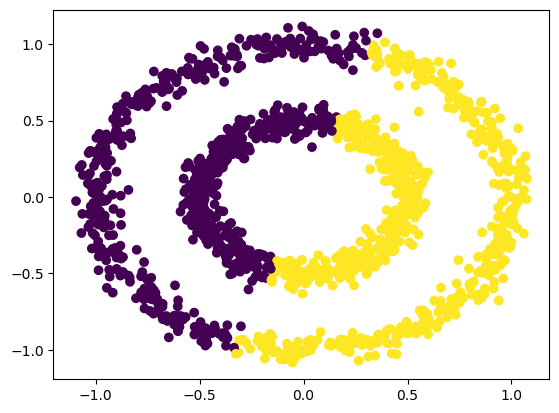

In [66]:
km = KMeans(n_clusters=2, random_state=0).fit(dataset1[["x", "y"]])
means = km.cluster_centers_    
pred = km.predict(dataset1[["x", "y"]]) 
plt.scatter(dataset1["x"], dataset1["y"], c=pred)
means


<h5 style="color:#001affff">18. Visualizing dataset1 clusters with K-Means including cluster centers marked on the scatter plot</h5>

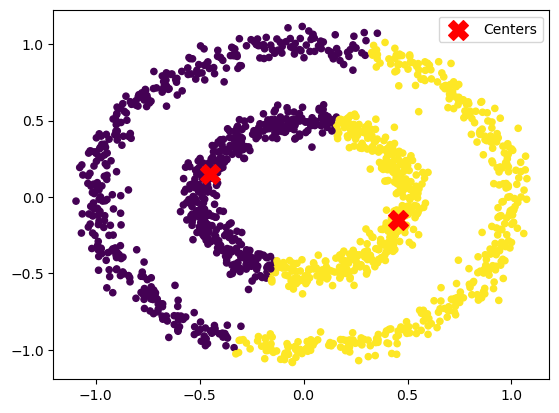

In [67]:
plt.scatter(dataset1["x"], dataset1["y"], c=pred, s=20, cmap="viridis")
plt.scatter(means[:,0], means[:,1], c="red", marker="X", s=200, label="Centers")
plt.legend()
plt.show()


<h5 style="color:#001affff">19. Predicting cluster assignments for new unseen points using K-Means model</h5>

In [68]:
new_points = np.array([[0.2, 0.3], [0.8, -0.5]])
print("Predictions for new points:", km.predict(new_points))

Predictions for new points: [1 1]


c:\Users\Rammah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


<h5 style="color:#001affff">20. Using the Elbow Method with K-Means to find the optimal number of clusters</h5>

c:\Users\Rammah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\Rammah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\Rammah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\Rammah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Wi

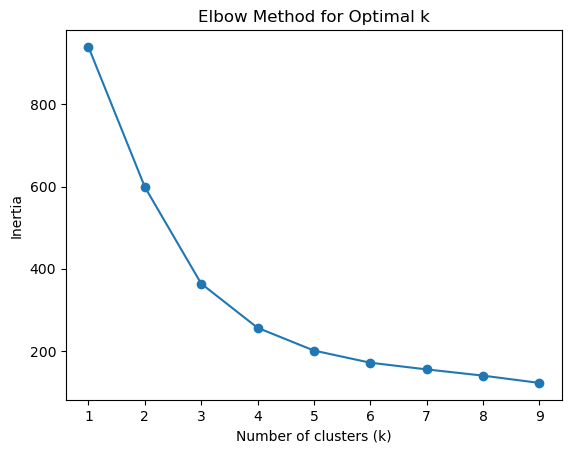

In [69]:
from sklearn.cluster import KMeans
distortions = []
for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=0).fit(dataset1[["x", "y"]])
    distortions.append(km.inertia_)

plt.plot(range(1, 10), distortions, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()


<h5 style="color:#001affff">21. Comparing clustering results of K-Means and Gaussian Mixture Model on the same dataset</h5>

c:\Users\Rammah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\Rammah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


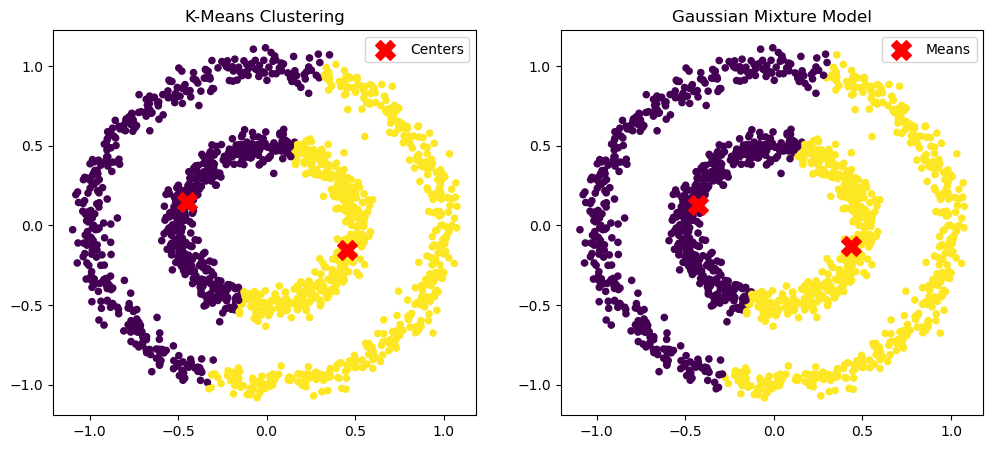

In [70]:
km = KMeans(n_clusters=2, random_state=0).fit(dataset1[["x", "y"]])
pred_km = km.predict(dataset1[["x", "y"]])

gm = GaussianMixture(n_components=2, random_state=0).fit(dataset1[["x", "y"]])
pred_gm = gm.predict(dataset1[["x", "y"]])

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(dataset1["x"], dataset1["y"], c=pred_km, cmap="viridis", s=20)
axes[0].scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], 
                c="red", marker="X", s=200, label="Centers")
axes[0].set_title("K-Means Clustering")
axes[0].legend()

axes[1].scatter(dataset1["x"], dataset1["y"], c=pred_gm, cmap="viridis", s=20)
axes[1].scatter(gm.means_[:,0], gm.means_[:,1], 
                c="red", marker="X", s=200, label="Means")
axes[1].set_title("Gaussian Mixture Model")
axes[1].legend()

plt.show()


<h5 style="color:#001affff">22. Kernel K-Means Clustering using Spectral Clustering with RBF Kernel</h5>

c:\Users\Rammah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


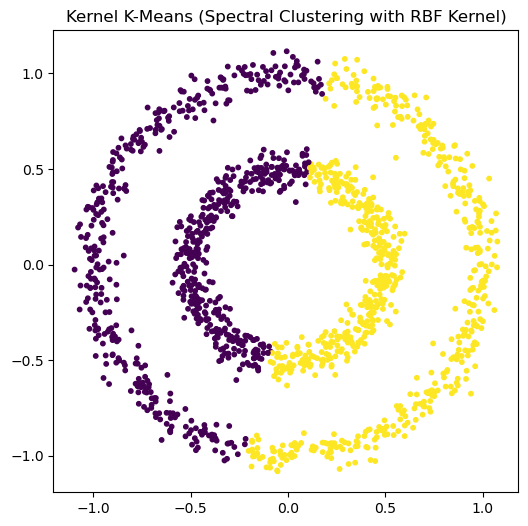

In [71]:
X, y = make_circles(n_samples=1500, factor=0.5, noise=0.05, random_state=0)
dataset1 = pd.DataFrame(X, columns=["x", "y"])

sc = SpectralClustering(n_clusters=2, affinity='rbf', gamma=15, random_state=0)
pred = sc.fit_predict(dataset1)

plt.figure(figsize=(6,6))
plt.scatter(dataset1["x"], dataset1["y"], c=pred, cmap="viridis", s=10)
plt.title("Kernel K-Means (Spectral Clustering with RBF Kernel)")
plt.show()